## importazione del dataframe dai dati di Mozilla

TODO mettere il logo di Mozilla Stumbler e MLS (Mozilla Location Service)

TODO trascrivere la documentazione dettagliata dei label delle colonne dal sito di Mozilla

TODO mettere mappa di Mozilla completa di punti WiFi

dati collaborativi, copertura mondiale, tanti dati, puliti, aperti, aggiornati, facilmente ottenibili, ben documentati

https://location.services.mozilla.com/downloads


## Mozilla Location Service

Is a service to provide geolocation coordinates from other sources of data (Bluetooth, cell or WiFi networks, GeoIP, etc.). It is using both Cell-ID and Wi-Fi based positioning (WPS) approaches.

Locate yourself, based on the radio environment around you.

The file format was developed in cooperation with the OpenCellID project. 

TODO mettere mappa di Mozilla completa di punti WiFi

### Statistics for Cell and WiFi networks

Metric | Value (in millions)
-------|--------------------
Wifi Networks | 521.61
Wifi Observations | 11006.56
MLS Cells | 20.39
MLS Cell Observations | 2468.46
OpenCellID Cells | 7.99

### Region Statistics

Region | GSM (2G) | UMTS (3G) | LTE (4G) | Total Cells | WiFis
-------|----------|-----------|----------|-------------|------
United States | 230236 | 976603 | 1595402 | 2802241 | 175599375
Germany | 294388 | 692172 | 128380 | 1114940 | 27748682
France | 193033 | 636640 | 143635 | 973308 | 28497705
United Kingdom | 175289 | 637625 | 124983 | 937897 | 27613264
Italy | 132468 | 516379 | 96489 | 745336 | 9844682

## OpenCellID

The service incorporates aggregated cell data from our partner the [OpenCellID project](http://opencellid.org/). The OpenCellID data is provided under the [CC-BY-SA 3.0 license](https://creativecommons.org/licenses/by-sa/3.0/) and can be acquired from the OpenCellID downloads section. 

## Cell Networks

<a href="https://creativecommons.org/publicdomain/zero/1.0/" rel="license">
<img src="/static/images/publicdomain.png" alt="CC0">
</a>

<img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" alt="CC0">

License Note

[CC0](https://creativecommons.org/publicdomain/zero/1.0/) (Public Domain)
To the extent possible under law, Mozilla Corporation has waived all copyright and related or neighboring rights to MLS Cell Network Export Data. This work is published from the United States.

We export both a daily snapshot of the entire cell network collection as well as hourly differential updates. File names contain either the word diff or full to specify their type. 

## WiFi Networks

The combination of a MAC address and a location is considered personal data in some jurisdictions, as it contains data about the owner of a WiFi network. The collection of this data is legal as long as an effective opt-out mechanism like the one we follow is provided. Lookups of individual WiFi records are prevented by the service by requiring a combination of two matching nearby WiFi networks in queries.

While we would like to openly share the data about WiFi networks, we do not know of any way to do so that would not lead to an exposure of personal data and made it possible to track the movements of WiFi networks over time.

## Observations

In addition to the aggregate network data, the service also gathers the raw observation data these aggregates are based on. While we do not store any individual user token with the observation data, the data itself contains plenty of unique characteristics, locations and timestamps that would allow someone to track the movements of the people contributing observations to this service.

We have therefor chosen to use a conservative approach and do not make the raw observation data public. In the future we might consider an additional explicit user opt-in, to let users signal their willingness to have their observation data published, as long as we can make the possible risk clear to them.


## Glossary

Cell-ID
    Cell ID describes both a globally unique identifier for any logical cell network, as well as an approach to locate devices based on prior knowledge of the positions of these cell networks. Sometimes the term cell global identity (CGI) can also be found. See also WPS.

observations
    An observation describes the data collected about a single station identified by its unique global identifier, additional data about the station like signal strength readings and report data about the position of the station.

OpenCellID
    OpenCellID is a collaborative project to create a free worldwide database of Cell IDs.

reports
    A report describes the data collected in a single reading, consisting of data about the position and movement at the time of taking the reading and data about multiple stations observable at the time. For example one report could contain information about one cell network and 10 WiFi networks.

stations
    A term referring to any radio signal emitting stationary device, or the radio network it emits. Examples of what we call stations are WiFi access points / WiFi network, cell towers / cell networks and Bluetooth Beacons / Bluetooth LE networks.

Web Mercator (WSG84)
    WSG 84 Web Mercator refers to the geographic map projection used throughout this project. The latitude and longitude values use WSG 84 as the coordinate reference system.

WPS
    Wi-Fi based positioning system describes a system of using prior knowledge about the location of WiFi networks, identified by their globally unique BSSID/MAC address, to position devices. See also Cell ID.

## Calculation

There’s two general approaches to calculate positions from signal sources, without the cooperation of the signal sources or mobile networks.

(1) Determine the location of signal sources from observations, then compare / trilaterate user locations.
(2) Generate signal fingerprints for a fine-grained grid of the world. Find best match for a observed fingerprint.

The second approach has a much better accuracy, but relies on a lot more available and constantly updated data. For most of the world this approach is not practical, so we currently focus on approach one.

In theory one would assume that one could use signal strength data to infer a distance measure from it. The further a device is away from the signal source, the weaker the signal should get.

Unfortunately the signal strength is more dependent on the device type, how a user holds a device and changing environmental factors like trucks in the way. Even worse modern networks adjust their signal strength to the number of devices inside their reception area. This makes this data practically useless while looking up a users position via a single reading.

In aggregate over many data points this information can still be valuable in determining the actual position of the signal source. While observing multiple signals at once, their relative strengths can also be used, as this keeps some of the changing factors constant, like the device type.

One other approach is using time of flight data as a distance metric. While there are some reflection and multipath problems it’s a much more accurate distance predictor. Fine grained enough timing data is unfortunately almost never available to the application or operating system layer in client devices. Some LTE networks and really modern WiFi networks with support for 802.11v are the rare exception to this. But these are so rare, that we currently ignore timing data.


## Accuracy

Depending on the signal standard, we can promise different sorts of accuracy.

Underlying this is the assumption that we have enough data about the area at all. With no or too little data we’ll have to fallback to less accurate data sources. WiFi is the most accurate, followed by cell based estimation using single cells, multiple cells or cell location areas. If all else fails GeoIP serves as a general fallback.

### WiFi

WiFi networks have a fairly limited range, with buildings in the way often only in the tens or low hundreds of meters. But caching layers in the operating system and time differences between when a WiFi scan happened and when this is made available to the calling app can lead to WiFi networks still being visible up to some kilometers away from their actual position if the device moves in the meantime.

This means position estimates based on WiFi networks are usually accurate to low hundreds of meters. If a lot of networks are available in the area accuracy tends to increase to 100 meter or less.

One challenge that’s particular severe in WiFi networks are all the constantly moving WiFi networks, for example those installed on buses or trains or in the form of hotspot enabled mobile phones or tablets. So movement detection and detecting inconsistencies between observed data and the database world view are important considerations.

### GSM

For GSM networks we will likely have access to the unique cell id of the serving cell only. In GSM networks the phone does not know the full cell ids of any neighboring cells, unless it associates with the new cell as part of a hand-over, forgetting the cell id of the old cell.

So we are limited to a basic Cell-ID approach, meaning we assume that the user is at the center of the current GSM cell area and use the cell radius as the accuracy.

GSM cells are restricted to a maximum range of 35km, but there are rare exceptions using the GSM extended range of 120km.

In more populated places the cell sizes are typically much smaller, but generally accuracy will be in the tens of kilometer range.

### WCDMA / UMTS

In WCDMA networks neighboring cell information can be available. But limitations in chipset drivers, the radio interface layer and the operating systems often hide this data from application code. Or only partially expose the cell identifiers, for example only exposing the carrier and primary scrambling code of the neighboring cells.

So in most cases we are limited to the same approach as for GSM cells. The typical cell sizes of UMTS cells are much smaller, which practically leads to a better accuracy. But WCDMA cells in rural areas can have a larger radius than GSM cells and we observed cells sizes of 60-70km.

In urban areas we should typically see accuracy in the 1 to 10 kilometer range.

### LTE

LTE networks are similar to WCDMA networks and the same restriction on neighboring cells applies. Instead of a primary scrambling code LTE uses a physical cell id, which for our purposes has similar characteristics.

LTE cells are again often even smaller than WCDMA cells which leads to better accuracies.

LTE networks also expose a time based distance metric in the form of the timing advance. While we currently don’t use this information, in the future it has the potential to significantly improve position estimates based on multiple cells.

### GeoIP

The accuracy of GeoIP depends a lot on the region the user is in. In the US GeoIP can be fairly accurate and often places the user in the right city or metropolitan area. In many other parts of the world GeoIP is only accurate to the region level.

Typical GeoIP accuracies are either in the 50km range for city based estimates or multiple hundred kilometers for region based estimates.

IP version 6 has the chance to improve this situation, as the need for private carrier networks and network address translation decreases. But so far this hasn’t made any measurable impact and most traffic is still restricted to IP version 4.




The data exchange format was created in collaboration with the OpenCellID project.

The data format does not specify the means and exact algorithms by which the position estimate or range calculation was done. The algorithms might be unique and changing for each source of the data, though both ichnaea and OpenCellID currently use similar and comparable techniques.

The fields in the CSV file are as follows:

## Cell Fields

code{
color: #E74C3C;
box-sizing: border-box;
}

```
radio
```
> Network type. One of the strings GSM, UMTS or LTE.

```
mcc
```
> Mobile Country Code. An integer, for example 505, the code for Australia.

```
net
```
> For GSM, UMTS and LTE networks, this is the mobile network code (MNC). An integer, for example 4, the MNC used by Vodaphone in the Netherlands.

```
area
```
> For GSM and UMTS networks, this is the location area code (LAC). For LTE networks, this is the tracking area code (TAC). An integer, for example 2035.

```
cell
```
> For GSM and LTE networks, this is the cell id or cell identity (CID). For UMTS networks this is the UTRAN cell id, which is the concatenation of 2 bytes of radio network controller (RNC) code and 2 bytes of cell id. An integer, for example 32345.

```
unit
```
> For UMTS networks, this is the primary scrambling code (PSC). For LTE networks, this is the physical cell id (PCI). For GSM networks, this is empty. An integer, for example 312.

```
lon
```
> Longitude in degrees between -180.0 and 180.0 using the WSG 84 reference system. A floating point number, for example 52.3456789.

```
lat
```
> Latitude in degrees between -90.0 and 90.0 using the WSG 84 reference system. A floating point number, for example -10.034.

```
range
```
> Estimate of radio range, in meters. This is an estimate on how large each cell area is, as a radius around the estimated position and is based on the observations or a knowledgeable source. An integer, for example 2500.

```
samples
```
> Total number of observations used to calculate the estimated position, range and averageSignal. An integer, for example 1200.

```
changeable
```
> Whether or not this cell is a position estimate based on observations, and therefore subject to change in the future, or is an exact location entered from a knowledgeable source. A boolean value, encoded as either 1 (for “changeable”) or 0 (for “exact”).

```
created
```
> Timestamp of the time when this record was first created. An integer, counting seconds since the UTC Unix Epoch of 1970-01-01T00:00:00Z. For example, 1406204196, which is the timestamp for 2014-07-24T12:16:36Z.

```
updated
```
> Timestamp of the time when this record was most recently modified. An integer, counting seconds since the UTC Unix Epoch of 1970-01-01T00:00:00Z. For example, 1406204196, which is the timestamp for 2014-07-24T12:16:36Z.

```
averageSignal
```
> Average signal strength from all observations for the cell network. An integer value, in dBm. For example, -72.

> This field is only used by the OpenCellID project and historically has been used as a hint towards the quality of the position estimate.




In [1]:

import numpy
# %pylab

import pandas

# dato che ci serve matplotlib useremo python 2
from matplotlib import pyplot

%matplotlib inline


In [3]:

dataframe = pandas.read_csv("../data/cell_towers_diff-2016012100.csv")

# coordinate = dataframe[['lon', 'lat']]

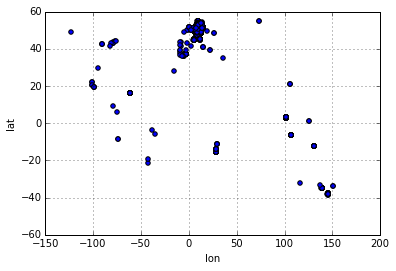

In [4]:
dataframe.plot(kind="scatter", x="lon", y="lat")

# pyplot.show()

## golocalizzazione

In [5]:
# import math

def euclideanDistace(x,y):
    return numpy.sqrt(numpy.square(x) + numpy.square(y))

In [6]:
import geopy # TODO AttributeError: 'module' object has no attribute 'distance'
from geopy import distance, geocoders

# distanze in km
# geopy.distance.vincenty(A, B) # su sferoide oblato
# geopy.distance.great_circle(A, B) # sulla sfera

# punti di prova
# A = (41.49008, -71.312796)
# B = (41.499498, -81.695391)

def geolocate(place): # string
    """
    return coordinates for addresses and toponyms
    """
    geolocator = geopy.geocoders.Nominatim()
    location = geolocator.geocode(place)
    # i dati si danno in (latitudine, longitudine), ma vanno intesi come (y, x)
    # ovvero vanno visualizzati come x=longitudine, y=latitudine
    return (location.latitude, location.longitude) # coordinate
    
def geodesicDistance(A, B = geolocate("Colosseo")):
    """
    return the Vincenty's geodesic distance in meters
    default place = Colosseum
    """
    # colosseo = (41.890183, 12.492369)
    return geopy.distance.vincenty(A, B).meters

def isInRome(place):
    """
    return True if the place is less than 10 km away from Colosseum
    """
    raggioRaccordoAnulare = 10000 # in metri
    return geodesicDistance(place) <= raggioRaccordoAnulare

In [7]:
name = "Sapienza, Roma"

print(geodesicDistance(geolocate(name)))
print(isInRome(geolocate(name)))

2099.29518992
True


In [8]:
colosseo = geopy.point.Point(41.890183, 12.492369)

# TODO fare map con coordinate nel datagrame

In [9]:
# import mpl_toolkits.basemap
# from mpl_toolkits.basemap import Basemap

# mappa = Basemap(projection='stere',lat_0=41.890183,lon_0=12.492369,resolution='l')
# mappa.drawcoastlines(linewidth=0.25)
# mappa.drawcountries(linewidth=0.25)
# mappa.fillcontinents(color='coral',lake_color='aqua')
# mappa.drawmapboundary(fill_color='aqua')
# mappa.drawmeridians(numpy.arange(0,360,30))
# mappa.drawparallels(numpy.arange(-90,90,30))

# x, y = map(lons*180./np.pi, lats*180./np.pi)
# cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
# plt.title('contour lines over filled continent background')
# plt.show()



In [10]:
# m = Basemap(width=100000,height=100000,projection='lcc',resolution=None,lat_0=41.890183,lon_0=12.492369)
#m.drawcoastlines()
#m.drawmapboundary(fill_color='aqua')
#m.fillcontinents(color='coral',lake_color='aqua')
# m.bluemarble()
## m.shadedrelief()

# resolution: c (crude), l (low), i (intermediate), h (high), f (full)

# plt.show()

In [11]:
import gmplot
from gmplot import GoogleMapPlotter

# gmap = gmplot.from_geocode("San Francisco")

gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)

#gmap.plot(latitudes, longitudes, 'cornflowerblue', edge_width=10)
#gmap.plot((41.890183, 41.891183), (12.492369, 12.493369), 'cornflowerblue', edge_width=10)
#gmap.scatter(more_lats, more_lngs, '#3B0B39', size=40, marker=False)
#gmap.scatter(marker_lats, marker_lngs, 'k', marker=True)
#gmap.heatmap(heat_lats, heat_lngs)

# gmap.draw("mymap.html")
print a

NameError: name 'a' is not defined

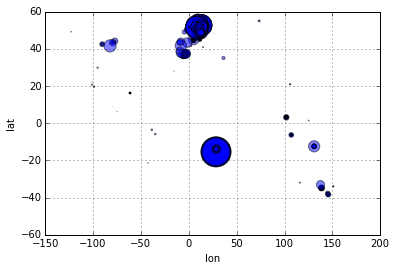

In [12]:
copertura = dataframe[["range"]]

dataframe.plot(kind="scatter", x="lon", y="lat", s=copertura/1000, alpha=0.5) # TODO

# pyplot.show()

## selezione dei dati

il filtraggio viene inizialmente fatto per mobile country code (Italy)
```python
mcc == 222
```
e successivamente vengono scartati i valori ritenuti inaffidabili, ovvero con soltanto una rilevazione
```python
samples > 1
```

In [13]:
isInItaly = dataframe.mcc == 222

isReliable = dataframe.samples > 1

# Crit3 = isInRome((dataframe.lat, dataframe.lon))

# AllCriteria = isInItaly & isReliable & Crit3

# dataframe[AllCriteria]

italia = dataframe[isInItaly & isReliable]

# TODO riordinare gli indici levando i buchi

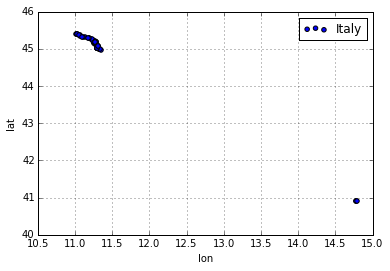

In [14]:
italia.plot(kind="scatter", x="lon", y="lat", label="Italy")

# pyplot.show()

Iuri ha fatto la selezione su Roma e ha creato un nuovo file csv  
TODO integrare il suo codice

```python
# isInRome((dataframe.lat, dataframe.lon))

italyDataframe["lat"].apply(sum)

dataframe["distanze"] = arrayDistanzeCalcolate

.apply()
.applymap()
.resample()
.transform()
.groupby

code_groups[['data']].transform(sum)
```

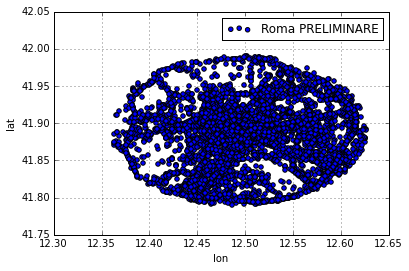

In [15]:
roma = pandas.read_csv("../data/roma_towers.csv")
roma.plot(kind="scatter", x="lon", y="lat", label="Roma PRELIMINARE")

# pyplot.show()

# TODO mettere il grafico quadrato e con le scale uguali
# e con le coordinate del colosseo al centro

# TODO mettere output del comando in SVG
# TODO mettere interattività, magari utilizzando Bokeh o mpld3

# vedere
# http://stackoverflow.com/questions/24525111/how-can-i-get-the-output-of-a-matplotlib-plot-as-an-svg
# https://nickcharlton.net/posts/outputting-matplotlib-plots.html

## TODO Capocci

<ul>
<li><input type="checkbox" checked>dati MLS</li>
<li><input type="checkbox" checked>filtro Roma</li>
<li><input type="checkbox" checked>grafo</li>
<li><input type="checkbox" checked>distribuzione del grado P(k)</li>
<li><input type="checkbox" checked>dati disaggregati per compagnia, canale radio, ecc</li>
<li><input type="checkbox" checked>soglia percolativa</li>
</ul>

## Creazione del grafo con NetworkX

TODO si può anche fare un grafo pesato sull'intensità del segnale  

TODO:

* mettere sfondo allo scatterplot con mappa terrestre
(farlo con le API di Google Maps o con quelle di OpenStreetMaps)

* provare API grafi per fare grafo delle antenne
* aggiungere colonna database per distanze e coperture antenne



In [16]:
import networkx

G = networkx.Graph()
G.add_node("Fede")
G.add_node("Iuri")
G.add_edge(1,2)
G.add_edge('a','b')
G.add_edge('a','c')
G.add_edge('c','d')
G.add_edge('c','e')
G.add_edge('c','f')
G.add_edge('a','d')


['a', 1, 'Fede', 'b', 'e', 'Iuri', 'f', 'c', 2, 'd']
[('a', 'c'), ('a', 'b'), ('a', 'd'), (1, 2), ('e', 'c'), ('f', 'c'), ('c', 'd')]


{1: array([ 0.21662852,  0.08226044]),
 2: array([ 0.65575623,  0.01664105]),
 'Fede': array([ 0.46162538,  0.        ]),
 'Iuri': array([ 0.        ,  0.64255976]),
 'a': array([ 0.83869163,  0.48669322]),
 'b': array([ 0.51991337,  0.41750826]),
 'c': array([ 0.78873727,  0.84999116]),
 'd': array([ 0.98855146,  0.61042264]),
 'e': array([ 0.37692387,  1.        ]),
 'f': array([ 0.62381488,  0.99543277])}

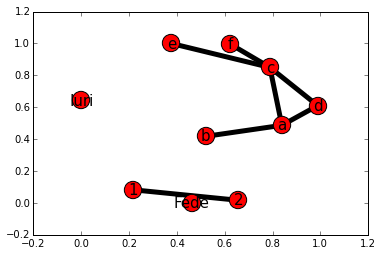

In [17]:
print(G.nodes())
print(G.edges())
position=networkx.spring_layout(G)
networkx.draw_networkx_nodes(G,position,node_size=300)
networkx.draw_networkx_edges(G,position,width=5)
networkx.draw_networkx_labels(G,position,font_size=15,font_family='sans-serif')
# pyplot.axis("off")

position


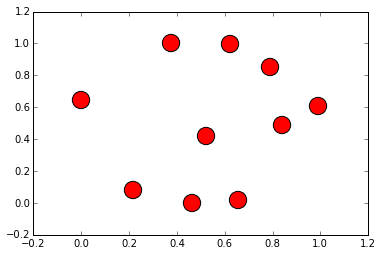

In [18]:
H=networkx.path_graph(10)
networkx.draw_networkx_nodes(G,position,node_size=300)

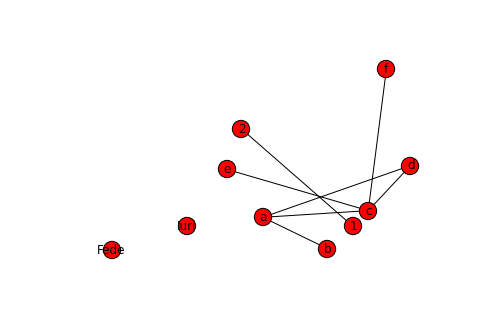

In [19]:
networkx.draw_random(G)

In [20]:
dataframePiccolo = italia[0:10]
dataframePiccolo["cell"]

3251    87079387
3255    87059907
3355    87031990
3411    86376981
3577    87058264
3578    87036959
3599    87069990
3600    87072795
3611    87058318
3612    87036956
Name: cell, dtype: int64

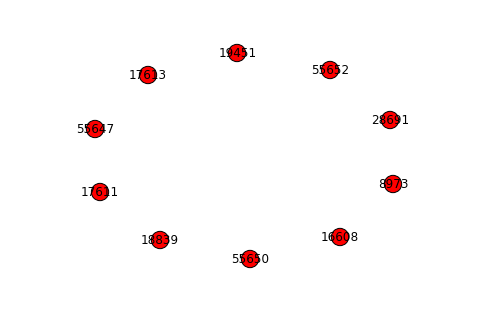

In [21]:
dataframePiccolo = roma[0:10]

grafoPiccolo = networkx.Graph()
grafoPiccolo.add_nodes_from(dataframePiccolo["cell"])
# grafoPiccolo.add_nodes_from(dataframePiccolo.iterrows())
# grafoPiccolo.add_nodes_from(dataframePiccolo.itertuples())
networkx.draw(grafoPiccolo)

In [22]:
import numpy
matriceDiAdiacenza = numpy.zeros((10,10), dtype=int)
# le matrici hanno indici che partono da zero
matriceDiAdiacenza

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [23]:


#dataframe = pandas.read_csv("../Siscomp_datas/cell_towers.csv")
romaPiccolo = roma[0:50]
#dataframe

#celle = dataframe[['cell', 'lat', 'lon', 'range']].values
#print celle
coordinate = romaPiccolo[['lat', 'lon']].values
raggio = romaPiccolo['range'].values

#print coordinate
#print raggio

def geodesicDistance(A, B):
    return geopy.distance.vincenty(A, B).meters

def sommaRange(A, B):
    return A+B

def sonoLinkati(A, rangeA, B, rangeB):
    return geodesicDistance(A, B) <= sommaRange(rangeA, rangeB)

def linkVettori(rigA, rigB):
    return sonoLinkati((rigA['lat'], rigA['lon']), rigA['range'], (rigB['lat'], rigB['lon']), rigB['range'])

dimensioni = raggio.size
a = numpy.zeros((dimensioni,dimensioni), dtype=int)
# print a

for i in xrange(raggio.size):
    for j in xrange(raggio.size):
        if geodesicDistance(coordinate[i], coordinate[j]) <= raggio[i] + raggio[j]:
            a[i,j] = 1
        if (i == j):
            a[i,j] = 0
print a


#for i in celle:
#    for j in celle:
#        if linkVettori(i, j):
#            a[i,j] = 1

            
#ridotto = dataframe[['cell', 'lat', 'lon', 'range']]        
#b = numpy.zeros((50,50))

#for i in ridotto.iterrows():
#    for j in ridotto.iterrows():
#        if linkVettori(i, j):
#            a[ridotto["index"],ridotto["index"]] = 1


[[0 0 1 ..., 1 1 1]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 1 1]
 [1 0 0 ..., 1 0 1]
 [1 0 0 ..., 1 1 0]]


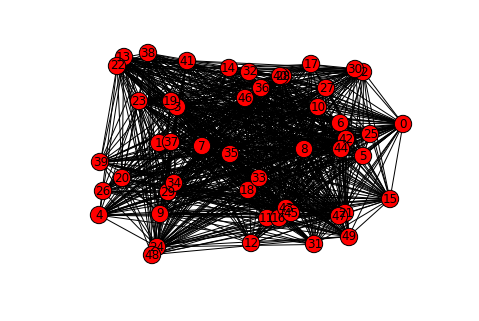

In [24]:
# A = numpy.reshape(numpy.random.random_integers(0,1,size=100),(10,10))
# D = networkx.DiGraph(A)

# networkx.draw(D)

F50 = networkx.Graph(a)


# position=networkx.spring_layout(F50)
# networkx.draw(F50)

# networkx.draw_networkx_nodes(F50,position,node_size=300)
# networkx.draw_networkx_edges(F50,position,width=5)
# networkx.draw_networkx_labels(F50,position,font_size=15,font_family='sans-serif')
networkx.draw_random(F50)

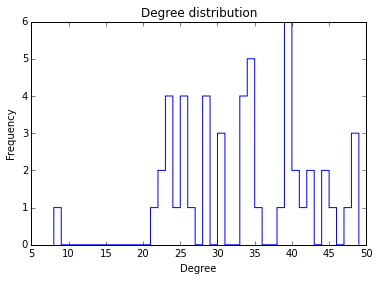

In [25]:
# networkx.degree(F50)
grado = F50.degree().values()

def degreeDistribution(gradi):
    pyplot.hist(gradi, bins=max(gradi)-min(gradi), histtype='step')
    pyplot.title('Degree distribution')
    pyplot.xlabel("Degree")
    pyplot.ylabel("Frequency")
    # return
    # histtype='bar', alpha=0.5
    # bins=max(grado)-min(grado)

distribuzione = degreeDistribution(grado)


## Distribuzione dei raggi di copertura delle antenne

TODO fare il fit esponenziale

ci sono molte antenne "piccole" e poche antenne "grandi"

ci sono pure alcune antenne dal raggio di copertura gigante $\sim 10 Km$
(ovvero quanto tutto il raggio del Grande Raccordo Anulare e quindi di tutto il nostro data sample)

probabilmente questi saranno degli hub se la nostra rete risulterà essere complessa

20341


20341.0

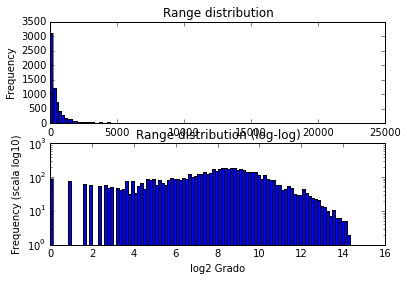

In [40]:
import numpy

# raggi = roma['range'].values

raggiPositivi = roma.range >= 1

raggiBuoni = roma[raggiPositivi].range.values

#distribuzioneRange = pyplot.hist(raggi, 100)

#distribuzioneRangeLogLog = pyplot.hist(numpy.log2(raggiBuoni), 100, log=True)

raggi = roma[raggiPositivi].range.values

pyplot.figure(1)
pyplot.subplot(211)
distribuzioneRange = pyplot.hist(raggi,bins=100)
pyplot.title('Range distribution')
pyplot.xlabel("Degree")
pyplot.ylabel("Frequency")

pyplot.subplot(212)
distribuzioneRangeLogLog = pyplot.hist(numpy.log2(raggiBuoni), 100, log=True)
pyplot.title('Range distribution (log-log)')
pyplot.xlabel("log2 Grado")
pyplot.ylabel("Frequency (scala log10)")

massimoRange = max(distribuzioneRange[1])
massimoRange


#numpy.nan in raggi
#min(raggi)

# TODO vedere se l'antenna di massimo range sta su Monte Mario
# TODO fare mappa geografica delle antenne di range gigante per vedere dove sono messe

TODO fare lo scatterplot georeferenziato con  

basemap e cartopy:

http://matplotlib.org/basemap/
http://scitools.org.uk/cartopy/docs/latest/
http://scitools.org.uk/cartopy/docs/latest/gallery.html

oppure con le API o bindings per OperStreetMaps o Google Maps


## multiprocessing e calcolo parallelo



In [27]:
from joblib import Parallel, delayed  
import multiprocessing

inputs = range(10)  
def processInput(i):  
    return i * i


num_cores = multiprocessing.cpu_count()

results = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in inputs)
results

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [28]:
def matriceSuperiore(datiCoordinate, datiRaggi):
    a = numpy.zeros((datiRaggi.size,datiRaggi.size))
    for i in xrange(datiRaggi.size):
        for j in xrange(datiRaggi.size-i-1):
            if geodesicDistance(datiCoordinate[i], datiCoordinate[j+i+1]) <= datiRaggi[i] + datiRaggi[j+i+1]:
#            if geodesicDistance(datiCoordinate[i], datiCoordinate[j+i+1]) <= datiRaggi[i] + datiRaggi[j+i+1]:
                a[i,j+i+1] = 1
                a[j+i+1,i] = 1
    return a


In [29]:
# iterare su una matrice numpy

def matriceSimilSimmetrica(N):
    """
    crea una matrice triangolare bassa
    (per adesso includendo la diagonale, per seplicità)
    """
    #a = range(N)
    #return [range(i+1) for i in a]
    
    #bucket = [0] * N
    for i in range(N):
        j = i + 1
        a[i] = [0] * j
    return a

b = numpy.zeros((5,5), dtype=int)

for i in numpy.nditer(b): print i

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [30]:
#tri = numpy.zeros((10, 10))
#dm = tri[numpy.triu_indices(10, 1)]
#dm

#tri[(1,2), (4,5)]

triangolo = matriceSimilSimmetrica(N)
triangolo
# listofzeros = [0] * n

NameError: name 'N' is not defined

<img src="https://i.imgflip.com/zjptw.jpg"/>